### Applied Data Analytics- Assignment 1

**Name:** Riya Shyam Huddar  
**Roll Number:** MDS202431  


### Load the dataset

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
df = pd.read_csv("D:/CMI/ADA/Assignment_1/linkstats.csv")  

In [5]:
df.head()

,timestamp,ifHCInOctets,ifHCOutOctets,ifInErrors,ifOutErrors,ifInUcastPackets,ifOutUcastPackets
0,1703858100,3380.495680,2876.390069,0.0,0.0,4.547973,4.646825
1,1703858400,3408.845196,3060.870004,0.0,0.0,4.684506,4.881705
2,1703858700,3378.864965,2789.810337,0.0,0.0,4.659316,4.735553
3,1703859000,3369.610477,3007.387779,0.0,0.0,4.510157,4.723786
4,1703859300,3411.716231,2774.699436,0.0,0.0,4.493931,4.608065


### Dataset Description

This dataset contains **hourly network interface statistics** collected over time. Each row corresponds to a timestamped observation, and the columns are described as follows:

| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `timestamp`           | Unix timestamp indicating the time of the observation.                     |
| `ifHCInOctets`        | Number of incoming bytes on the interface, measured with high-capacity counters.      |
| `ifHCOutOctets`       | Number of outgoing bytes on the interface, measured with high-capacity counters.     |
| `ifInErrors`          | Number of incoming packets that resulted in errors.                         |
| `ifOutErrors`         | Number of outgoing packets that resulted in errors.                         |
| `ifInUcastPackets`    | Number of incoming unicast packets received.                                |
| `ifOutUcastPackets`   | Number of outgoing unicast packets sent.                                    |

**Notes:**
- All values are numeric.  
- `timestamp` can be converted to a date/time format for analysis.  
- This data is suitable for **time series analysis** of network traffic and error patterns.


### Convert timestamp to datetime and sort data by timestamp

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
# Sort by timestamp
df = df.sort_values('timestamp').reset_index(drop=True)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21704 entries, 0 to 21703
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          21704 non-null  datetime64[ns]
 1   ifHCInOctets       21704 non-null  float64       
 2   ifHCOutOctets      21704 non-null  float64       
 3   ifInErrors         21704 non-null  float64       
 4   ifOutErrors        21704 non-null  float64       
 5   ifInUcastPackets   21704 non-null  float64       
 6   ifOutUcastPackets  21704 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.2 MB
None


### Overview

- **Number of entries:** 21,704  
- **Number of columns:** 7  
- **Column types:** 1 datetime (`timestamp`), 6 numeric (`float64`)  
- **Missing values:** None  


We dont see observe missing values in the data

In [12]:
print(df.describe())

                           timestamp  ifHCInOctets  ifHCOutOctets  ifInErrors  \
count                          21704  21704.000000   21704.000000     21704.0   
mean   2024-02-05 06:44:46.343531264   3662.194603    3121.831474         0.0   
min              2023-12-29 13:55:00   3065.859687    1777.563807         0.0   
25%              2024-01-17 10:03:45   3186.130385    2581.760481         0.0   
50%              2024-02-05 07:12:30   3233.332602    2640.237080         0.0   
75%              2024-02-24 03:21:15   3313.122753    2750.465240         0.0   
max              2024-03-13 23:30:00  39759.369003   51812.894384         0.0   
std                              NaN   2106.497138    2165.381802         0.0   

       ifOutErrors  ifInUcastPackets  ifOutUcastPackets  
count      21704.0      21704.000000       21704.000000  
mean           0.0          5.849191           5.989371  
min            0.0          4.029608           3.105736  
25%            0.0          4.281504  

### Hourly Link Utilization

In this analysis, **hourly link utilization** is calculated as the **sum of incoming and outgoing bytes** (`ifHCInOctets + ifHCOutOctets`) for each hour. It represents the total network traffic passing through the link in that hour and helps us understand overall network usage patterns and forecast future usage.


In [14]:
# Add the inbound and outbound octets to compute total traffic
df['total_bytes'] = (df['ifHCInOctets'] + df['ifHCOutOctets'])

# Resample to hourly traffic (sum all traffic in each hour)
df_hourly = df.set_index('timestamp').resample('h').sum()

df_hourly = df_hourly.reset_index()


In [16]:
df_hourly[['timestamp', 'total_bytes']].head()

,timestamp,total_bytes
0,2023-12-29 13:00:00,6256.885749
1,2023-12-29 14:00:00,76190.879442
2,2023-12-29 15:00:00,81155.652166
3,2023-12-29 16:00:00,70218.914790
4,2023-12-29 17:00:00,70264.381986


In [18]:
print(df_hourly[['timestamp', 'total_bytes']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    1811 non-null   datetime64[ns]
 1   total_bytes  1811 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.4 KB
None


In [20]:
print(df_hourly[['timestamp', 'total_bytes']].describe())

                           timestamp    total_bytes
count                           1811    1811.000000
mean   2024-02-05 05:59:59.999999744   81303.424611
min              2023-12-29 13:00:00    6256.885749
25%              2024-01-17 09:30:00   70065.683098
50%              2024-02-05 06:00:00   71103.922053
75%              2024-02-24 02:30:00   75162.642204
max              2024-03-13 23:00:00  348562.139438
std                              NaN   29444.182820


In [22]:
# Check basic stats for all columns
print(df.describe())

# Check if error columns are all zero
print("\nAre inbound errors all zero?", df['ifInErrors'].eq(0).all())
print("Are outbound errors all zero?", df['ifOutErrors'].eq(0).all())

# Drop error columns if they are all zero
if df['ifInErrors'].eq(0).all() and df['ifOutErrors'].eq(0).all():
    df = df.drop(columns=['ifInErrors', 'ifOutErrors'])
    print("\nDropped error columns since they are all zero.")

# Check remaining columns
print("\nRemaining columns:")
print(df.columns)


                           timestamp  ifHCInOctets  ifHCOutOctets  ifInErrors  \
count                          21704  21704.000000   21704.000000     21704.0   
mean   2024-02-05 06:44:46.343531264   3662.194603    3121.831474         0.0   
min              2023-12-29 13:55:00   3065.859687    1777.563807         0.0   
25%              2024-01-17 10:03:45   3186.130385    2581.760481         0.0   
50%              2024-02-05 07:12:30   3233.332602    2640.237080         0.0   
75%              2024-02-24 03:21:15   3313.122753    2750.465240         0.0   
max              2024-03-13 23:30:00  39759.369003   51812.894384         0.0   
std                              NaN   2106.497138    2165.381802         0.0   

       ifOutErrors  ifInUcastPackets  ifOutUcastPackets   total_bytes  
count      21704.0      21704.000000       21704.000000  21704.000000  
mean           0.0          5.849191           5.989371   6784.026077  
min            0.0          4.029608           3.10573

### Questions We Are Addressing

1. How does the network link utilization change over time?  
2. Can we forecast the link utilization for the next seven days?  
3. Which model (regression, ARIMA, or exponential smoothing) gives the best predictions?  
4. Do the model residuals indicate a good fit?  


In [24]:
# Drop error columns as they have all zero values
df = df.drop(columns=['ifInErrors', 'ifOutErrors'], errors='ignore')
df_hourly = df_hourly.drop(columns=['ifInErrors', 'ifOutErrors'], errors='ignore')

In [26]:
df_hourly.head()

,timestamp,ifHCInOctets,ifHCOutOctets,ifInUcastPackets,ifOutUcastPackets,total_bytes
0,2023-12-29 13:00:00,3380.495680,2876.390069,4.547973,4.646825,6256.885749
1,2023-12-29 14:00:00,41529.255001,34661.624441,58.900425,60.264449,76190.879442
2,2023-12-29 15:00:00,43670.009994,37485.642172,68.862814,70.114644,81155.652166
3,2023-12-29 16:00:00,38908.122917,31310.791872,52.168403,52.911135,70218.914790
4,2023-12-29 17:00:00,38943.610156,31320.771830,52.517717,53.239306,70264.381986


----

### Exploratory Data Analysis: Plots of the Data

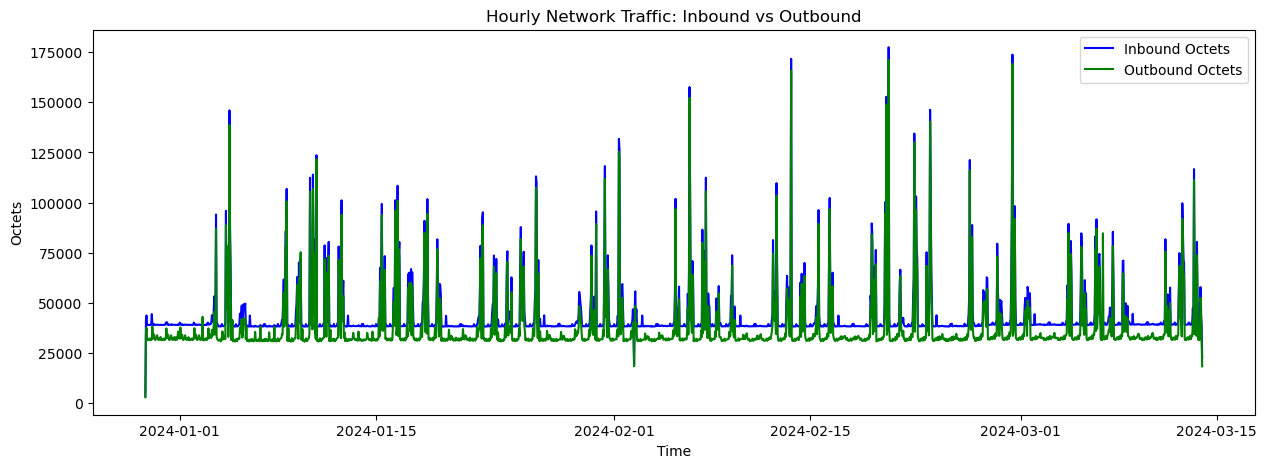

In [28]:
# Set timestamp as index
df_hourly = df_hourly.set_index('timestamp')
plt.figure(figsize=(15,5))
plt.plot(df_hourly.index, df_hourly['ifHCInOctets'], label='Inbound Octets', color='blue')
plt.plot(df_hourly.index, df_hourly['ifHCOutOctets'], label='Outbound Octets', color='green')
plt.xlabel('Time')
plt.ylabel('Octets')
plt.title('Hourly Network Traffic: Inbound vs Outbound')
plt.legend()
plt.show()


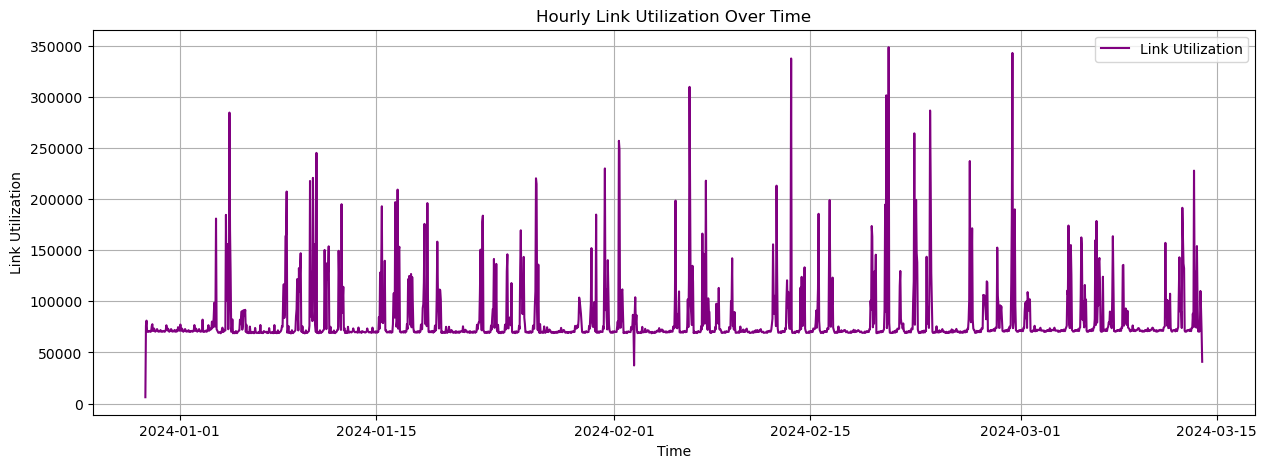

In [30]:
plt.figure(figsize=(15,5))
plt.plot(df_hourly.index, df_hourly['total_bytes'], color='purple', label='Link Utilization')
plt.xlabel('Time')
plt.ylabel('Link Utilization')
plt.title('Hourly Link Utilization Over Time')
plt.legend()
plt.grid(True)
plt.show()


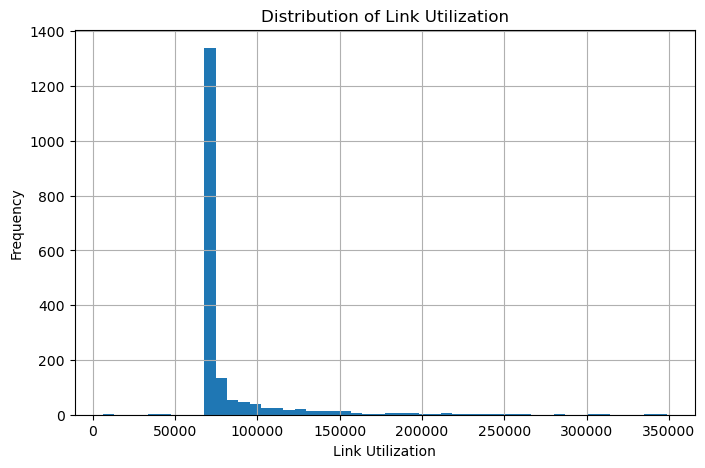

In [32]:
df_hourly['total_bytes'].hist(bins=50, figsize=(8,5))
plt.xlabel('Link Utilization')
plt.ylabel('Frequency')
plt.title('Distribution of Link Utilization')
plt.show()


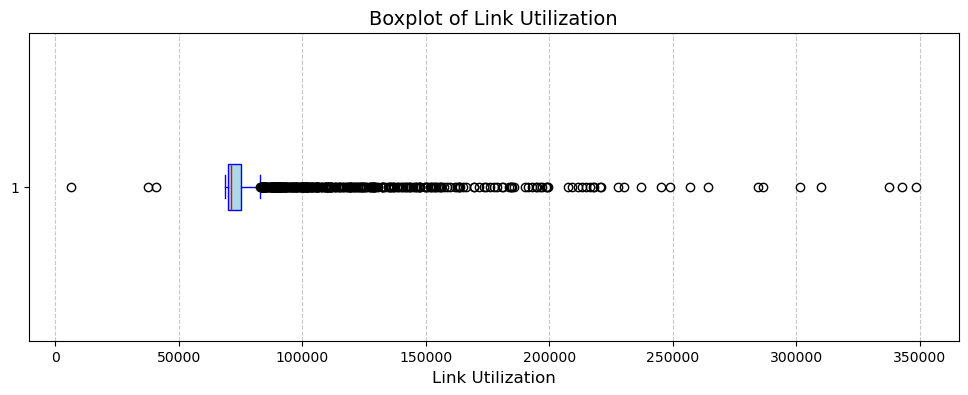

In [34]:
plt.figure(figsize=(12, 4))  # wider figure for clarity
plt.boxplot(df_hourly['total_bytes'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))
plt.title('Boxplot of Link Utilization', fontsize=14)
plt.xlabel('Link Utilization', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Interpretation:
Most hours have moderate traffic, but a number of hours show very high spikes, visible as outliers. These spikes indicate periods of unusually high network usage, which might affect forecasting.

------

### Task 1: Linear Regression Forecast of Link Utilization


Check to see if we have data present for each hour

In [36]:
# Check if hourly data is continuous
df_hourly=df_hourly.reset_index()
hour_diff = df_hourly['timestamp'].diff().dropna()  # differences between consecutive timestamps
print(hour_diff.value_counts())


timestamp
0 days 01:00:00    1810
Name: count, dtype: int64


### Forecast for the next 7 days
$ 24\times7  = 168$ hours


Training Metrics:
R²  : 0.0015
MSE : 894917849.62

Test Metrics:
R²  : -0.0014
MSE : 747357753.66


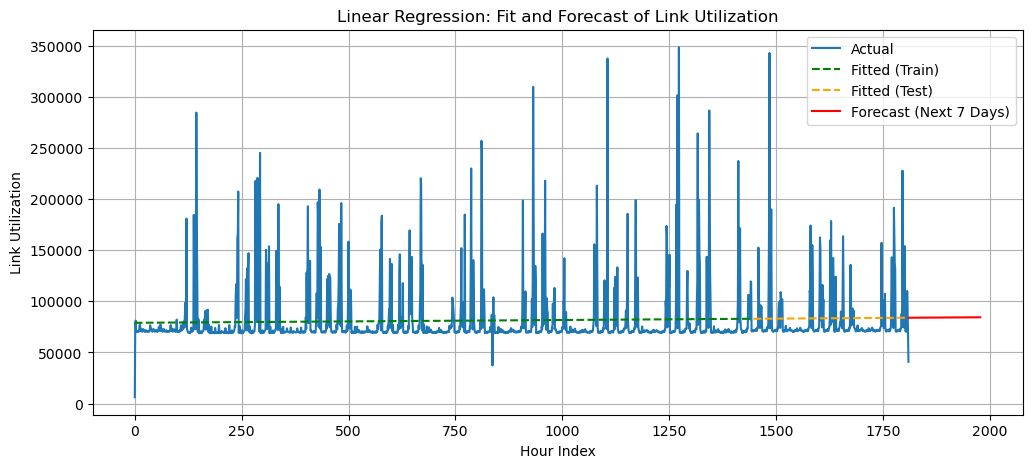


--- Next 7 Days Forecast (First 20 Hours) ---

              Datetime  Predicted_Utilization
0  2024-03-14 00:00:00           83990.066996
1  2024-03-14 01:00:00           83992.795588
2  2024-03-14 02:00:00           83995.524180
3  2024-03-14 03:00:00           83998.252773
4  2024-03-14 04:00:00           84000.981365
5  2024-03-14 05:00:00           84003.709957
6  2024-03-14 06:00:00           84006.438550
7  2024-03-14 07:00:00           84009.167142
8  2024-03-14 08:00:00           84011.895735
9  2024-03-14 09:00:00           84014.624327
10 2024-03-14 10:00:00           84017.352919
11 2024-03-14 11:00:00           84020.081512
12 2024-03-14 12:00:00           84022.810104
13 2024-03-14 13:00:00           84025.538696
14 2024-03-14 14:00:00           84028.267289
15 2024-03-14 15:00:00           84030.995881
16 2024-03-14 16:00:00           84033.724474
17 2024-03-14 17:00:00           84036.453066
18 2024-03-14 18:00:00           84039.181658
19 2024-03-14 19:00:00          

In [102]:
# --- Prepare data ---
df_hourly['hour_index'] = np.arange(len(df_hourly))
X_bytes = df_hourly[['hour_index']]  # predictor as DataFrame
y_bytes = df_hourly['total_bytes']

# --- Train/Test split: 80% train, 20% test ---
train_size_bytes = int(len(df_hourly) * 0.8)
X_bytes_train, X_bytes_test = X_bytes.iloc[:train_size_bytes], X_bytes.iloc[train_size_bytes:]
y_bytes_train, y_bytes_test = y_bytes.iloc[:train_size_bytes], y_bytes.iloc[train_size_bytes:]

# --- Fit Linear Regression on training data ---
linear_model_bytes = LinearRegression()
linear_model_bytes.fit(X_bytes_train, y_bytes_train)

# --- Predictions ---
y_bytes_train_pred = linear_model_bytes.predict(X_bytes_train)
y_bytes_test_pred = linear_model_bytes.predict(X_bytes_test)

# --- Evaluation metrics ---
mse_bytes_train = mean_squared_error(y_bytes_train, y_bytes_train_pred)
r2_bytes_train = r2_score(y_bytes_train, y_bytes_train_pred)

mse_bytes_test = mean_squared_error(y_bytes_test, y_bytes_test_pred)
r2_bytes_test = r2_score(y_bytes_test, y_bytes_test_pred)

print("Training Metrics:")
print(f"R²  : {r2_bytes_train:.4f}")
print(f"MSE : {mse_bytes_train:.2f}\n")

print("Test Metrics:")
print(f"R²  : {r2_bytes_test:.4f}")
print(f"MSE : {mse_bytes_test:.2f}")

# --- Forecast next 7 days (168 hours) ---
future_hours_bytes = pd.DataFrame({'hour_index': np.arange(len(df_hourly), len(df_hourly)+168)})
forecast_bytes = linear_model_bytes.predict(future_hours_bytes)

# --- Plot ---
plt.figure(figsize=(12,5))
plt.plot(X_bytes, y_bytes, label='Actual')
plt.plot(X_bytes_train, y_bytes_train_pred, label='Fitted (Train)', color='green', linestyle='--')
plt.plot(X_bytes_test, y_bytes_test_pred, label='Fitted (Test)', color='orange', linestyle='--')
plt.plot(future_hours_bytes, forecast_bytes, label='Forecast (Next 7 Days)', color='red')
plt.xlabel('Hour Index')
plt.ylabel('Link Utilization')
plt.title('Linear Regression: Fit and Forecast of Link Utilization')
plt.legend()
plt.grid(True)
plt.show()


# --- Create future datetime index (next 168 hours after last timestamp) ---
last_timestamp = pd.to_datetime(df_hourly['timestamp']).iloc[-1]
future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1),
                                  periods=168, freq='h')

# --- Forecast next 7 days ---
future_hours_bytes = pd.DataFrame({'hour_index': np.arange(len(df_hourly), len(df_hourly)+168)})
forecast_bytes = linear_model_bytes.predict(future_hours_bytes)

# --- Display first 20 forecasted values with timestamps ---
forecast_bytes_df = pd.DataFrame({
    "Datetime": future_timestamps,
    "Predicted_Utilization": forecast_bytes
})
print("\n--- Next 7 Days Forecast (First 20 Hours) ---\n")
print(forecast_bytes_df.head(20))


In [104]:
print("Slope:", linear_model_bytes.coef_[0])
print("Intercept:", linear_model_bytes.intercept_)


Slope: 2.7285923788097257
Intercept: 79048.5861975309


### Interpretation

We fitted a **linear regression model** to forecast the hourly link utilization for the next 7 days.

- **Predictor:** `hour_index` (numeric index of each hour in the dataset)  
- **Target:** `link_utilization` (%)

The model learned the relationship:

$$
\hat{y} = slope \cdot hour\_index + intercept
$$

**Results:**  

- **Slope:** $(2.728)$  
- **Intercept:** $(79048.58)$  

> Since the slope is extremely small, the predicted line is almost **flat**. This indicates that link utilization is **stable over time** and does not show a strong linear trend.

**Implication:**  
- Linear regression predicts **essentially the average utilization**.  
- To capture **hourly variations and patterns**, we need more advanced methods like **ARIMA**.


### Autoregression (AR) Model

AR models predict a time series using its past values:

$$
y_t = c + \phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \epsilon_t
$$

- $(p)$ = number of lags  
- Fit on training data, evaluate on test data  
- Use fitted model to forecast future values


Training Metrics:
R²  : 0.2525, MSE: 680126030.60

Test Metrics:
R²  : 0.2019, MSE: 608532767.31


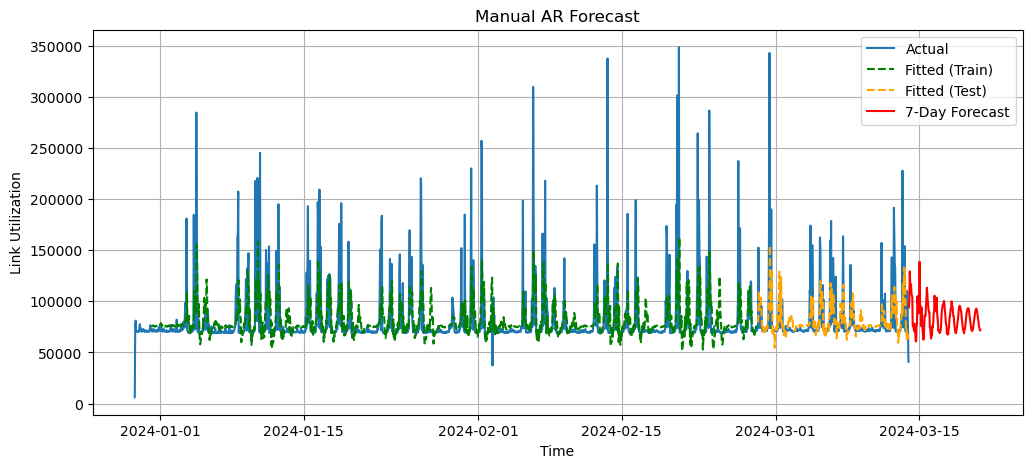


Next 7 days forecast:

              Datetime  Predicted_Utilization
0  2024-03-14 00:00:00           94068.626141
1  2024-03-14 01:00:00          100757.087775
2  2024-03-14 02:00:00          129352.565939
3  2024-03-14 03:00:00          119156.443863
4  2024-03-14 04:00:00          109207.928764
5  2024-03-14 05:00:00          116693.099529
6  2024-03-14 06:00:00          108408.252508
7  2024-03-14 07:00:00          105563.521106
8  2024-03-14 08:00:00          104313.844079
9  2024-03-14 09:00:00           75988.900816
10 2024-03-14 10:00:00           75890.754871
11 2024-03-14 11:00:00           74242.219204
12 2024-03-14 12:00:00           71298.371806
13 2024-03-14 13:00:00           78280.614564
14 2024-03-14 14:00:00           70001.769982
15 2024-03-14 15:00:00           69570.296242
16 2024-03-14 16:00:00           60919.283420
17 2024-03-14 17:00:00           61067.898785
18 2024-03-14 18:00:00           75344.604490
19 2024-03-14 19:00:00           78386.568236


In [106]:
# --- Parameters ---
manual_ar_lags = 40           # number of lagged values to use
manual_ar_forecast_hours = 7 * 24   # forecast next 7 days (hourly)

# --- Ensure datetime index ---
if not pd.api.types.is_datetime64_any_dtype(df_hourly.index):
    df_hourly = df_hourly.set_index('timestamp')

y_manual_ar = df_hourly['total_bytes']

# --- Create lagged features ---
df_manual_ar_lags = pd.DataFrame({'y': y_manual_ar})
for i in range(1, manual_ar_lags + 1):
    df_manual_ar_lags[f'lag_{i}'] = df_manual_ar_lags['y'].shift(i)
df_manual_ar_lags.dropna(inplace=True)

# --- Train/Test split (last 20% for test) ---
n_manual_ar_test = int(len(df_manual_ar_lags) * 0.2)
X_manual_ar = df_manual_ar_lags.drop('y', axis=1).values
y_manual_ar_values = df_manual_ar_lags['y'].values

X_manual_ar_train, X_manual_ar_test = X_manual_ar[:-n_manual_ar_test], X_manual_ar[-n_manual_ar_test:]
y_manual_ar_train, y_manual_ar_test = y_manual_ar_values[:-n_manual_ar_test], y_manual_ar_values[-n_manual_ar_test:]

# --- Fit Linear Regression (manual AR) ---
manual_ar_model = LinearRegression()
manual_ar_model.fit(X_manual_ar_train, y_manual_ar_train)

# --- Predictions ---
y_manual_ar_train_pred = manual_ar_model.predict(X_manual_ar_train)
y_manual_ar_test_pred = manual_ar_model.predict(X_manual_ar_test)

# --- Evaluation metrics ---
mse_manual_ar_train = mean_squared_error(y_manual_ar_train, y_manual_ar_train_pred)
r2_manual_ar_train = r2_score(y_manual_ar_train, y_manual_ar_train_pred)
mse_manual_ar_test = mean_squared_error(y_manual_ar_test, y_manual_ar_test_pred)
r2_manual_ar_test = r2_score(y_manual_ar_test, y_manual_ar_test_pred)

print("Training Metrics:")
print(f"R²  : {r2_manual_ar_train:.4f}, MSE: {mse_manual_ar_train:.2f}")
print("\nTest Metrics:")
print(f"R²  : {r2_manual_ar_test:.4f}, MSE: {mse_manual_ar_test:.2f}")

# --- Recursive forecast for next 7 days ---
manual_ar_history = y_manual_ar_values[-manual_ar_lags:].tolist()
manual_ar_forecast = []

for _ in range(manual_ar_forecast_hours):
    X_input = np.array(manual_ar_history[-manual_ar_lags:]).reshape(1, -1)
    yhat = manual_ar_model.predict(X_input)[0]
    manual_ar_forecast.append(yhat)
    manual_ar_history.append(yhat)

# --- Create datetime index for forecast ---
manual_ar_forecast_index = pd.date_range(start=y_manual_ar.index[-1] + pd.Timedelta(hours=1),
                                         periods=manual_ar_forecast_hours, freq='h')

# --- Train/test indices for plotting ---
train_index = y_manual_ar.index[manual_ar_lags : manual_ar_lags + len(y_manual_ar_train_pred)]
test_index = y_manual_ar.index[manual_ar_lags + len(y_manual_ar_train_pred) : manual_ar_lags + len(y_manual_ar_train_pred) + len(y_manual_ar_test_pred)]

# --- Plot ---
plt.figure(figsize=(12,5))
plt.plot(y_manual_ar, label='Actual')
plt.plot(train_index, y_manual_ar_train_pred, label='Fitted (Train)', color='green', linestyle='--')
plt.plot(test_index, y_manual_ar_test_pred, label='Fitted (Test)', color='orange', linestyle='--')
plt.plot(manual_ar_forecast_index, manual_ar_forecast, label='7-Day Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Link Utilization')
plt.title('Manual AR Forecast')
plt.legend()
plt.grid(True)
plt.show()

# --- Forecast DataFrame ---
manual_ar_forecast_df = pd.DataFrame({
    "Datetime": manual_ar_forecast_index,
    "Predicted_Utilization": manual_ar_forecast
})
print("\nNext 7 days forecast:\n")
print(manual_ar_forecast_df.head(20))


### Manual AR Model Forecast

We implemented a manual autoregressive (AR) model using 40 lagged hourly values as predictors. The model was trained on the first 80% of the data and tested on the remaining 20%.  

Using recursive forecasting, we predicted the link utilization for the next 7 days (168 hours). This approach captures short-term autocorrelation patterns, allowing the forecast to reflect hourly variations better than a simple linear regression.


--------------

### Task 2: ARIMA

### Seasonal Decomposition

Seasonal decomposition is a method to break a time series into three components:

1. **Trend:** The long-term direction or pattern in the data.  
2. **Seasonal:** Repeating patterns or cycles at fixed periods (e.g., daily or weekly).  
3. **Residual:** Random fluctuations or noise not explained by trend or seasonality.

This helps visualize underlying patterns, guide forecasting methods, and determine if the data is stationary.


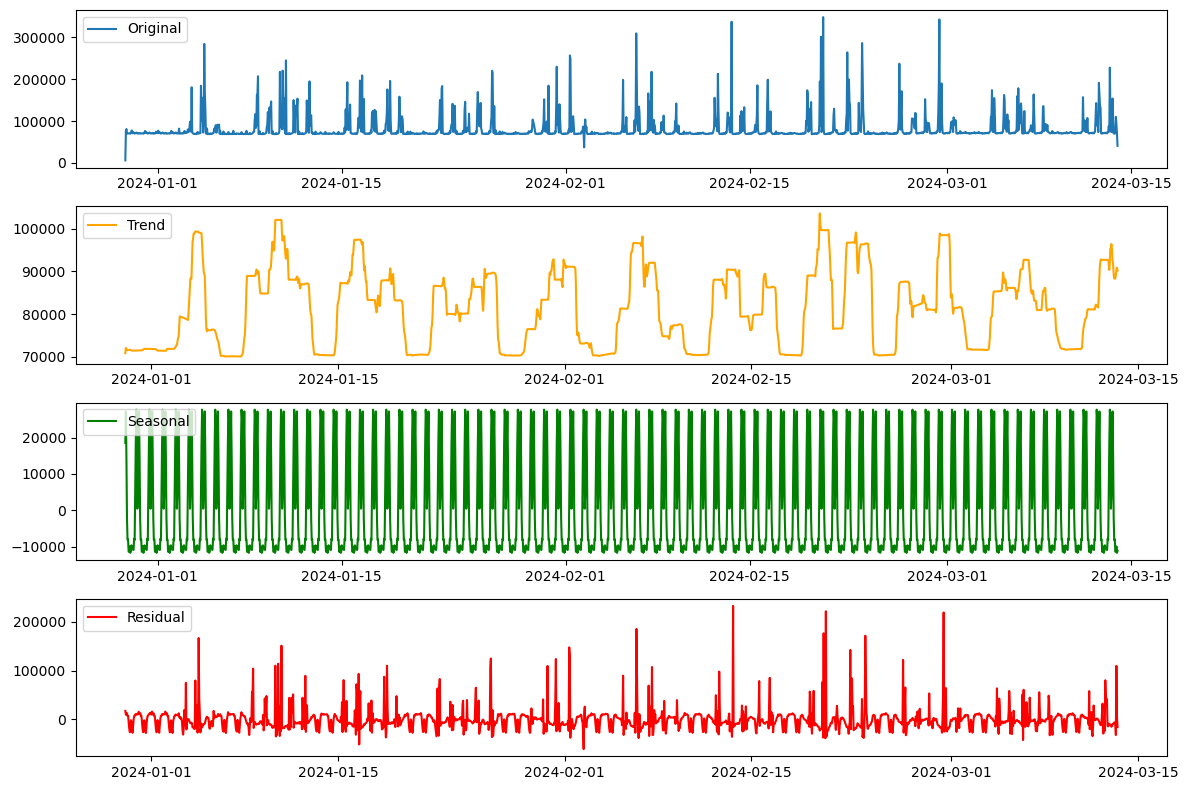

In [46]:
# Use the hourly data
#df_hourly = df_hourly.set_index('timestamp')  # make sure timestamp is index

# Seasonal decomposition (additive)
decomposition = seasonal_decompose(df_hourly['total_bytes'], model='additive', period=24)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.plot(df_hourly['total_bytes'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(4,1,4)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Observations from Seasonal Decomposition

- **Trend:** The trend fluctuates over time— we see a non-linear trend, further analysis 
- **Seasonal:** There is a clear repeating pattern, indicating daily cycles in network usage.  
- **Residual:** The residuals appear mostly random, suggesting that the decomposition captures the main patterns in the data.


### Augmented Dickey-Fuller (ADF) Test

The ADF test is used to check whether a time series is **stationary** or not.  

- **Stationary:** statistical properties like mean and variance do not change over time.  
- **Non-stationary:** series has trends, seasonality, or changing variance.  

**Hypotheses:**  
- H0 (null): The series is non-stationary.  
- H1 (alternative): The series is stationary.  

A low p-value (< 0.05) indicates the series is likely stationary.


In [48]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test
result = adfuller(df_hourly['total_bytes'])

# Extract results
adf_stat = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]

print(f'ADF Statistic: {adf_stat}')
print(f'p-value: {p_value}')
print(f'Used Lag: {used_lag}')
print(f'Number of Observations: {n_obs}')

# Interpretation
if p_value < 0.05:
    print("The series is likely stationary (reject H0).")
else:
    print("The series is likely non-stationary (fail to reject H0).")


ADF Statistic: -5.359615954360624
p-value: 4.115552283316814e-06
Used Lag: 25
Number of Observations: 1785
The series is likely stationary (reject H0).


### ADF Test Result Interpretation

- **ADF Statistic:** -5.36  
- **p-value:** 0.0000041  
- **Used Lag:** 25  
- **Number of Observations:** 1785  

**Interpretation:**  
Since the p-value is much less than 0.05, we reject the null hypothesis (H0) and conclude that the hourly link utilization series is **likely stationary**.  
This means we can proceed with ARIMA modeling without any differencing.


### Using ACF and PACF to Identify ARIMA Parameters

- **ACF (Autocorrelation Function):**  
  Measures how the series is correlated with its past values at different lags.  
  - **Helps choose `q` (MA order):** Look for the lag where ACF **suddenly drops to near zero**. This indicates how many past error terms influence the series.

- **PACF (Partial Autocorrelation Function):**  
  Measures the direct correlation with past values after removing the influence of intermediate lags.  
  - **Helps choose `p` (AR order):** Look for the lag where PACF **cuts off**, showing how many past values directly affect the current value.


**Key idea:**  
- **Cutoff patterns** in ACF/PACF suggest the order of MA or AR terms.  
- **Gradual decay** in ACF usually indicates the need for differencing (`d`) to remove trends.


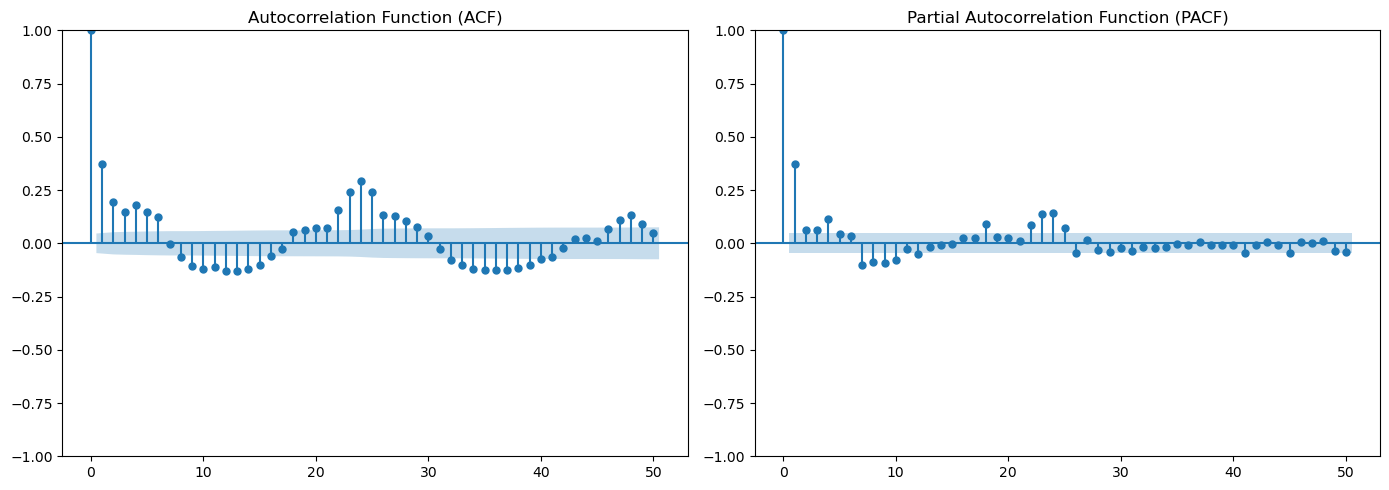

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14,5))

plot_acf(df_hourly['total_bytes'], lags=50, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df_hourly['total_bytes'], lags=50, ax=axes[1], method='ywm')
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


### ARIMA Modeling and Forecasting

**Objective:** Forecast the next 7 days of hourly link utilization using an ARIMA model.

**Steps Followed:**

1. **Data Preparation:**  
   - The time series (`total_bytes`) was split into **training** (all but last 7 days) and **test** (last 7 days) sets.

2. **Candidate Selection for ARIMA Parameters:**  
   - Computed **ACF** and **PACF** of the training series.  
   - Selected the top lags showing the largest drops in PACF as `p` candidates and in ACF as `q` candidates.  
   - Differencing order `d` was set to 0 since the series showed no strong trend.

3. **Grid Search:**  
   - Trained ARIMA models on the training set for all combinations of selected `(p,d,q)` candidates.  
   - Forecasted the test set and computed **Mean Squared Error (MSE)**.  
   - Selected the model with the **lowest MSE** as the best ARIMA model.

4. **Forecasting and Visualization:**  
   - Plotted the last 40 hours of training data, the actual test set, and the predictions from the best model.  
   - The final model can now be used to forecast future utilization.

**Key Outcome:**  
- Identified the **best ARIMA model** automatically from candidate lags with its performance measured by MSE.


In [52]:
series = df_hourly['total_bytes']

In [54]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
import warnings

def pq_top_dips(series, nlags=40, top_n=2, min_lag=5):

    acf_vals = acf(series, nlags=nlags, fft=False)
    pacf_vals = pacf(series, nlags=nlags, method='yw')
    acf_vals[0] = pacf_vals[0] = np.nan

    acf_diffs = np.diff(acf_vals)
    pacf_diffs = np.diff(pacf_vals)
    acf_sorted = np.argsort(acf_diffs) + 1
    pacf_sorted = np.argsort(pacf_diffs) + 1

    acf_candidates = [lag for lag in acf_sorted if lag >= min_lag][:top_n]
    pacf_candidates = [lag for lag in pacf_sorted if lag >= min_lag][:top_n]

    print("Top PACF dips (p candidates, lag ≥ 5):")
    for i, lag in enumerate(pacf_candidates, 1):
        print(f"{i}. Lag {lag}, drop={pacf_diffs[lag-1]:.4f}")

    print("\nTop ACF dips (q candidates, lag ≥ 5):")
    for i, lag in enumerate(acf_candidates, 1):
        print(f"{i}. Lag {lag}, drop={acf_diffs[lag-1]:.4f}")

    return pacf_candidates, acf_candidates
p_candidates, q_candidates = pq_top_dips(series, nlags=40)

Top PACF dips (p candidates, lag ≥ 5):
1. Lag 7, drop=-0.1371
2. Lag 26, drop=-0.1153

Top ACF dips (q candidates, lag ≥ 5):
1. Lag 7, drop=-0.1262
2. Lag 26, drop=-0.1117


--- Automatically Selected Candidates ---
Top 3 p candidates (from PACF drops): [7, 26, 5]
Top 3 q candidates (from ACF drops): [7, 26, 8]

--- Starting ARIMA Grid Search on Selected Candidates ---
ARIMA(7,0,7) -> MSE=528787764.08
ARIMA(7,0,26) -> MSE=551699356.68
ARIMA(7,0,8) -> MSE=574068304.00
ARIMA(26,0,7) -> MSE=539974807.52
ARIMA(26,0,26) -> MSE=515453641.74
ARIMA(26,0,8) -> MSE=539914962.40
ARIMA(5,0,7) -> MSE=540128544.72
ARIMA(5,0,26) -> MSE=554050694.52
ARIMA(5,0,8) -> MSE=542386744.44

--- Grid Search Complete ---
The best model is ARIMA(26, 0, 26) with an MSE of 515453641.74


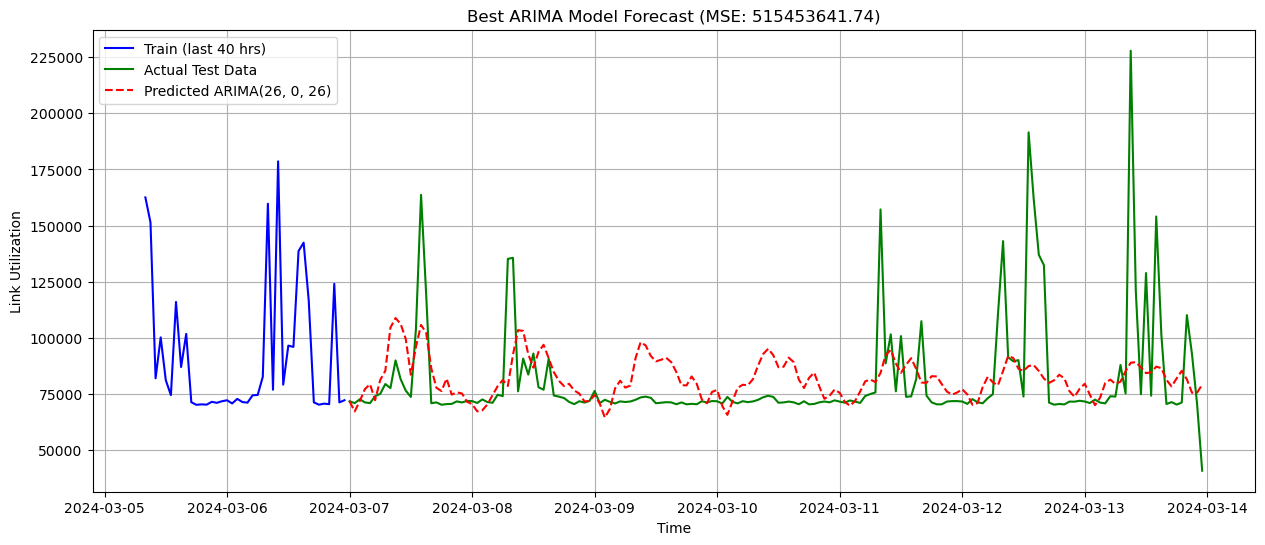

In [56]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
import warnings

warnings.filterwarnings("ignore")

# Automated Candidate Selection Function 
def find_best_lags(series, nlags=40, top_n=3, min_lag=5):
    acf_vals = acf(series, nlags=nlags, fft=False)
    pacf_vals = pacf(series, nlags=nlags, method='yw')
    acf_diffs = np.diff(acf_vals)
    pacf_diffs = np.diff(pacf_vals)
    acf_sorted_indices = np.argsort(acf_diffs) + 1
    pacf_sorted_indices = np.argsort(pacf_diffs) + 1


    p_candidates = [int(lag) for lag in pacf_sorted_indices if lag >= min_lag][:top_n]
    q_candidates = [int(lag) for lag in acf_sorted_indices if lag >= min_lag][:top_n]
    
    print("--- Automatically Selected Candidates ---")
    print(f"Top {top_n} p candidates (from PACF drops): {p_candidates}")
    print(f"Top {top_n} q candidates (from ACF drops): {q_candidates}\n")

    return p_candidates, q_candidates

# Data split
series = df_hourly['total_bytes']
n_test = 7 * 24
train, test = series[:-n_test], series[-n_test:]

# Run Candidate Selection and Grid Search 
p_candidates, q_candidates = find_best_lags(train)
d = 0
results = []
print("--- Starting ARIMA Grid Search on Selected Candidates ---")

for p in p_candidates:
    for q in q_candidates:
        order = (p, d, q)
        try:
            model = ARIMA(train, order=order)
            fit = model.fit()
            forecast = fit.forecast(steps=len(test))
            mse = mean_squared_error(test, forecast)
            results.append((order, mse, forecast))
            # FIX: Use the p, d, q variables directly in the f-string for a clean print
            print(f"ARIMA({p},{d},{q}) -> MSE={mse:.2f}")
        except Exception as e:
            print(f"ARIMA({p},{d},{q}) -> Failed with error: {e}")
            continue

# Find and Display the Best Model
results = sorted(results, key=lambda x: x[1])
best_order, best_mse, best_forecast = results[0]

print("\n--- Grid Search Complete ---")
print(f"The best model is ARIMA{best_order} with an MSE of {best_mse:.2f}")

# Plot the Best Model's Forecast

plt.figure(figsize=(15, 6))
plt.plot(train.index[-40:], train.tail(40), label="Train (last 40 hrs)", color="blue")
plt.plot(test.index, test, label="Actual Test Data", color="green")
plt.plot(test.index, best_forecast, label=f"Predicted ARIMA{best_order}", color="red", linestyle="--")
plt.title(f"Best ARIMA Model Forecast (MSE: {best_mse:.2f})")
plt.xlabel("Time")
plt.ylabel("Link Utilization")
plt.legend()
plt.grid(True)
plt.show()

In [117]:
print("ARIMA(26,0,26) summary:")
print(full_fit.summary())
print(f"AIC: {full_fit.aic}, BIC: {full_fit.bic}\n")


# Compare AIC and BIC
print("Model comparison based on AIC and BIC:")
print(f"ARIMA(26,0,26) - AIC: {full_fit.aic}, BIC: {full_fit.bic}")

ARIMA(26,0,26) summary:
                               SARIMAX Results                                
Dep. Variable:            total_bytes   No. Observations:                 1811
Model:               ARIMA(26, 0, 26)   Log Likelihood              -20938.934
Date:                Sun, 07 Sep 2025   AIC                          41985.868
Time:                        20:39:17   BIC                          42282.957
Sample:                    12-29-2023   HQIC                         42095.501
                         - 03-13-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.13e+04   3173.793     25.617      0.000    7.51e+04    8.75e+04
ar.L1         -0.1926      7.604     -0.025      0.980     -15.097      14.711
ar.L2          0.3066      4

### Use Train-Test Split and Train

In [58]:
df_hourly = df_hourly.reset_index()

Training ARIMA(26, 0, 26) on training set...
Model training complete.

Train MSE: 667464092.51, R²: 0.2552
Test MSE: 710531674.83, R²: 0.0479



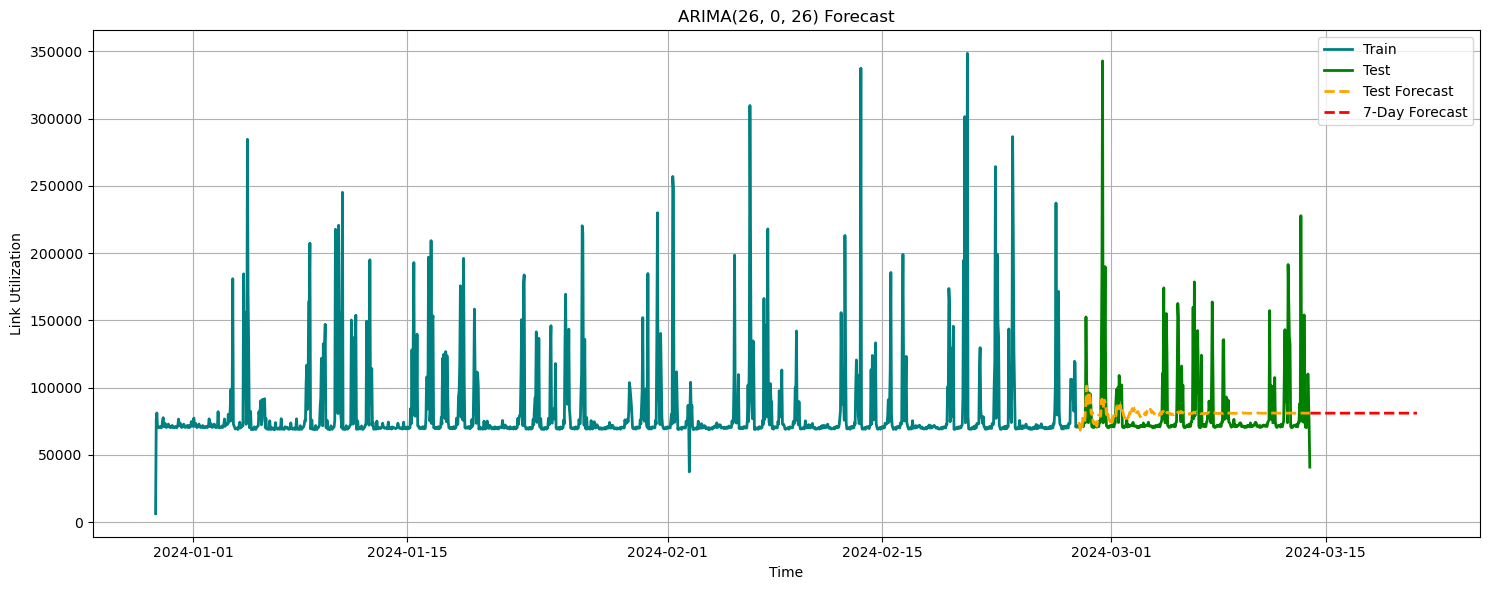


--- Next 7 Days Forecast (First 20 Hours) ---

                     Predicted_Utilization
Datetime                                  
2024-03-14 00:00:00           81005.347387
2024-03-14 01:00:00           80997.235177
2024-03-14 02:00:00           80996.432678
2024-03-14 03:00:00           81015.042729
2024-03-14 04:00:00           81030.740727
2024-03-14 05:00:00           81014.889045
2024-03-14 06:00:00           80998.647538
2024-03-14 07:00:00           81014.905032
2024-03-14 08:00:00           81041.311779
2024-03-14 09:00:00           81046.398437
2024-03-14 10:00:00           81024.116371
2024-03-14 11:00:00           81011.004603
2024-03-14 12:00:00           81036.565000
2024-03-14 13:00:00           81059.413408
2024-03-14 14:00:00           81039.826700
2024-03-14 15:00:00           81015.717206
2024-03-14 16:00:00           81021.293886
2024-03-14 17:00:00           81037.866510
2024-03-14 18:00:00           81040.108118
2024-03-14 19:00:00           81022.174262


In [88]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# --- Step 1: Prepare the series ---
ts_series = df_hourly.set_index('timestamp')['total_bytes']
ts_series.index = pd.to_datetime(ts_series.index)  # ensure datetime index

# --- Step 2: Train/Test Split (80% train, 20% test) ---
train_size = int(len(ts_series) * 0.8)
train, test = ts_series.iloc[:train_size], ts_series.iloc[train_size:]

# --- Step 3: Train ARIMA on training set ---
arima_order = (26, 0, 26)
print(f"Training ARIMA{arima_order} on training set...")
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()
print("Model training complete.\n")

# --- Step 4: Compute training metrics ---
train_pred = arima_fit.fittedvalues
mse_train = mean_squared_error(train, train_pred)
r2_train = r2_score(train, train_pred)
print(f"Train MSE: {mse_train:.2f}, R²: {r2_train:.4f}")

# --- Step 5: Forecast the test set ---
test_forecast = arima_fit.forecast(steps=len(test))
mse_test = mean_squared_error(test, test_forecast)
r2_test = r2_score(test, test_forecast)
print(f"Test MSE: {mse_test:.2f}, R²: {r2_test:.4f}\n")

# --- Step 6: Forecast next 7 days (168 hours) ---
forecast_horizon = 7 * 24
full_forecast = arima_fit.forecast(steps=len(test) + forecast_horizon)

# Create datetime index starting after test set
future_index = pd.date_range(start=test.index[-1] + pd.Timedelta(hours=1),
                             periods=forecast_horizon, freq='h')

# --- Step 7: Plot Train, Test, Test Forecast, and 7-Day Forecast ---
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label="Train", color="teal", linewidth=2)
plt.plot(test.index, test, label="Test", color="green", linewidth=2)
plt.plot(test.index, test_forecast, label="Test Forecast", color="orange", linestyle="--", linewidth=2)
plt.plot(future_index, full_forecast[len(test):], label="7-Day Forecast", color="red", linestyle="--", linewidth=2)
plt.title(f"ARIMA{arima_order} Forecast")
plt.xlabel("Time")
plt.ylabel("Link Utilization")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 8: Display next 7 days forecasted values (single Datetime column) ---
forecast_7days_df = pd.DataFrame({
    "Datetime": future_index,
    "Predicted_Utilization": full_forecast[len(test):]
}).set_index('Datetime')  # Set datetime as index for cleaner display

print("\n--- Next 7 Days Forecast (First 20 Hours) ---\n")
print(forecast_7days_df.head(20))


### Training ARIMA on the Full Data

Training ARIMA(26, 0, 26) on the full dataset...
Model training complete.



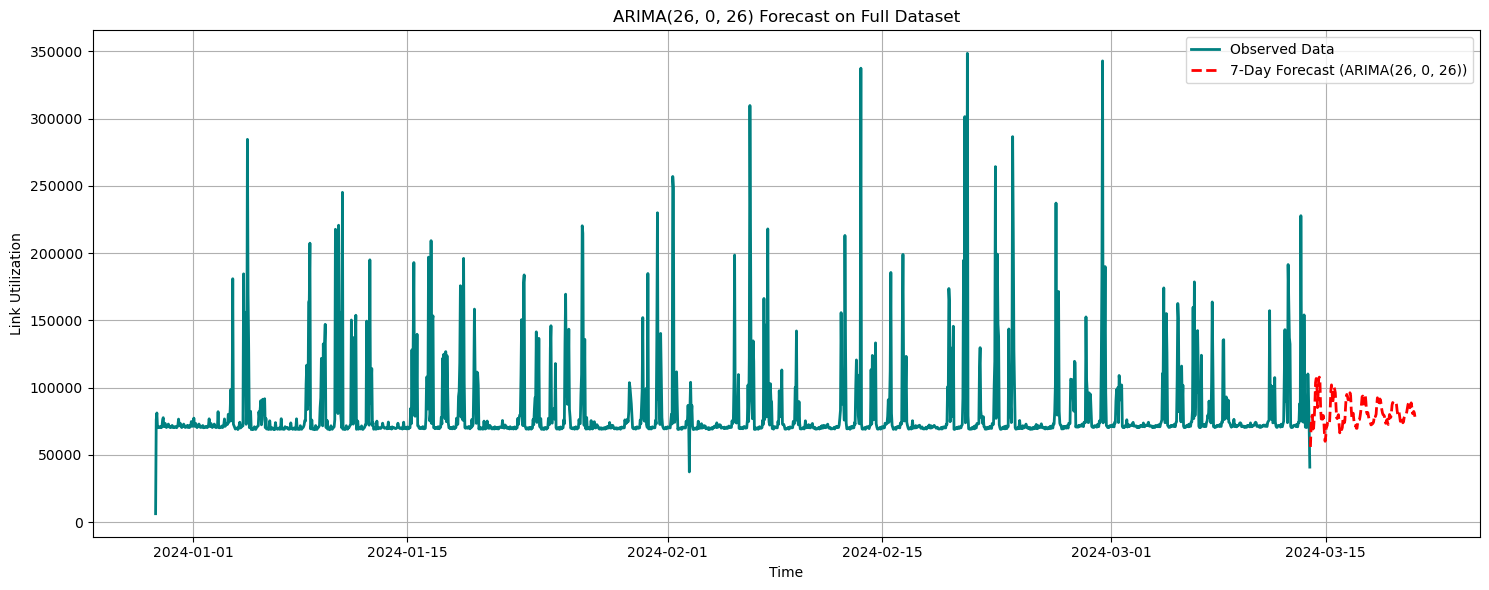


--- Next 7 Days Forecast (First 20 Hours) ---

              Datetime  Predicted_Utilization
0  2024-03-14 00:00:00           55897.934002
1  2024-03-14 01:00:00           71773.797603
2  2024-03-14 02:00:00           78054.559029
3  2024-03-14 03:00:00           79560.357759
4  2024-03-14 04:00:00           69190.771009
5  2024-03-14 05:00:00           70003.157556
6  2024-03-14 06:00:00           77957.698574
7  2024-03-14 07:00:00           88150.275474
8  2024-03-14 08:00:00          103684.859573
9  2024-03-14 09:00:00          106779.076105
10 2024-03-14 10:00:00          105286.380917
11 2024-03-14 11:00:00           85149.944848
12 2024-03-14 12:00:00           94733.568939
13 2024-03-14 13:00:00          107034.881346
14 2024-03-14 14:00:00          107794.826184
15 2024-03-14 15:00:00          103437.394785
16 2024-03-14 16:00:00           83799.023309
17 2024-03-14 17:00:00           76663.711669
18 2024-03-14 18:00:00           80412.378287
19 2024-03-14 19:00:00          

In [100]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# --- Step 1: Prepare the series ---
ts_series = df_hourly.set_index('timestamp')['total_bytes']
ts_series.index = pd.to_datetime(ts_series.index)  # ensure datetime index

# --- Step 2: Train ARIMA on the full dataset ---
arima_order = (26, 0, 26)
print(f"Training ARIMA{arima_order} on the full dataset...")
full_model = ARIMA(ts_series, order=arima_order)
full_fit = full_model.fit()
print("Model training complete.\n")

# --- Step 3: Forecast the next 7 days (168 hours) ---
forecast_horizon = 7 * 24
forecast_values = full_fit.forecast(steps=forecast_horizon)

# --- Step 4: Create datetime index for forecast ---
forecast_index = pd.date_range(start=ts_series.index[-1] + pd.Timedelta(hours=1),
                               periods=forecast_horizon, freq='H')

# --- Step 5: Plot the entire series + 7-day forecast ---
plt.figure(figsize=(15, 6))
plt.plot(ts_series.index, ts_series, label="Observed Data", color="teal", linewidth=2)
plt.plot(forecast_index, forecast_values, label=f"7-Day Forecast (ARIMA{arima_order})",
         color="red", linestyle="--", linewidth=2)

plt.title(f"ARIMA{arima_order} Forecast on Full Dataset")
plt.xlabel("Time")
plt.ylabel("Link Utilization")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 6: Create forecast DataFrame without duplicate datetime ---
forecast_7days_df = forecast_values.reset_index()
forecast_7days_df.columns = ["Datetime", "Predicted_Utilization"]

print("\n--- Next 7 Days Forecast (First 20 Hours) ---\n")
print(forecast_7days_df.head(20))



### Final ARIMA Forecast (Full Dataset)

We trained an **ARIMA(26,0,26)** model on the **entire dataset** to maximize the available information.  
- The model was then used to generate a **7-day hourly forecast (168 points)**.  
- The plot shows the full observed series along with the projected utilization values.  
- This final step provides a practical outlook of expected link utilization for the upcoming week, based on the patterns learned from the complete historical data.


------

### Task 3: Exponential Smoothing

In [122]:
df_hourly = df_hourly.reset_index()  # moves current index to a column

### Exponential Smoothing Forecast

Exponential Smoothing is a time series forecasting method that gives more weight to recent observations while capturing trend and seasonal patterns. In this analysis, we use the Holt-Winters variant to account for both additive trend and additive seasonality in the data. The model is applied to the hourly series to generate short-term forecasts and evaluate predictive performance.


Train MSE: 730410692.3296
Train R² : 0.1850
Test MSE: 567112726.7306
Test R² : 0.2401


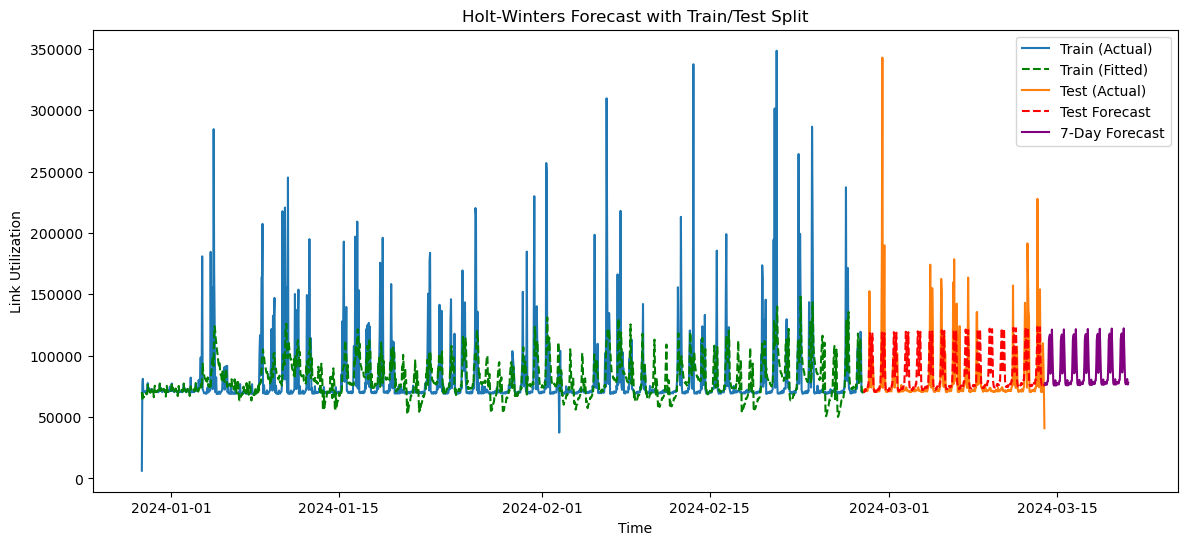


--- Next 7 Days Forecast (First 20 Hours) ---

              Datetime  Predicted_Utilization
0  2024-03-14 00:00:00           77559.070364
1  2024-03-14 01:00:00           76160.073517
2  2024-03-14 02:00:00           77742.593989
3  2024-03-14 03:00:00           76829.355580
4  2024-03-14 04:00:00           76366.651898
5  2024-03-14 05:00:00           79262.020719
6  2024-03-14 06:00:00           79332.603723
7  2024-03-14 07:00:00           92212.206234
8  2024-03-14 08:00:00          112500.893605
9  2024-03-14 09:00:00          115595.800669
10 2024-03-14 10:00:00          117169.115916
11 2024-03-14 11:00:00           85318.056985
12 2024-03-14 12:00:00           93720.147885
13 2024-03-14 13:00:00          103505.837097
14 2024-03-14 14:00:00          121297.989662
15 2024-03-14 15:00:00          103170.056337
16 2024-03-14 16:00:00           88661.514123
17 2024-03-14 17:00:00           77028.520443
18 2024-03-14 18:00:00           75764.504427
19 2024-03-14 19:00:00          

In [128]:
# --- Load your data ---

y = df_hourly.set_index('timestamp')['total_bytes']

# --- Train/Test split (80/20) ---
train_size = int(len(y) * 0.8)
train, test = y.iloc[:train_size], y.iloc[train_size:]

# --- Fit Holt-Winters model on training data ---
# Additive trend and seasonality, daily seasonality (period=24)
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=24)
hw_fit = hw_model.fit()

# --- Forecast on test set ---
y_test_pred = hw_fit.forecast(steps=len(test))

# --- Training fitted values ---
y_train_pred = hw_fit.fittedvalues

# --- Training performance ---
mse_train = mean_squared_error(train, y_train_pred)
r2_train = r2_score(train, y_train_pred)
print(f"Train MSE: {mse_train:.4f}")
print(f"Train R² : {r2_train:.4f}")

# --- Evaluation on test set ---
mse_test = mean_squared_error(test, y_test_pred)
r2_test = r2_score(test, y_test_pred)
print(f"Test MSE: {mse_test:.4f}")
print(f"Test R² : {r2_test:.4f}")

# --- Forecast next 7 days (168 hours) using full series ---
hw_model_full = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=24)
hw_fit_full = hw_model_full.fit()
forecast_7days = hw_fit_full.forecast(steps=168)
forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(hours=1),
                               periods=168, freq='h')

# --- Plot ---
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train (Actual)')
plt.plot(train.index, y_train_pred, label='Train (Fitted)', color='green', linestyle='--')
plt.plot(test.index, test, label='Test (Actual)')
plt.plot(test.index, y_test_pred, label='Test Forecast', color='red', linestyle='--')
plt.plot(forecast_index, forecast_7days, label='7-Day Forecast', color='purple')
plt.xlabel('Time')
plt.ylabel('Link Utilization')
plt.title('Holt-Winters Forecast with Train/Test Split')
plt.legend()
plt.show()

# --- Create forecast DataFrame ---
forecast_df = forecast_7days.reset_index()
forecast_df.columns = ["Datetime", "Predicted_Utilization"]

print("\n--- Next 7 Days Forecast (First 20 Hours) ---\n")
print(forecast_df.head(20))


### Holt-Winters (Exponential Smoothing) Forecast

We applied the **Holt-Winters exponential smoothing model** with:
- **Additive trend**  
- **Additive daily seasonality** (period = 24 hours)

**Approach:**
- Trained on 80% of the data, evaluated on 20% (test set).
- Then refit on the full series and forecasted **7 days ahead (168 hours)**.

**Key point:**  
Unlike linear regression or manual AR, Holt-Winters effectively **captures both daily patterns and trend**, producing forecasts that reflect recurring hourly cycles in network utilization.


------

### Task 4: Model Comparison – Forecasting Total Bytes

We evaluated four different models for forecasting hourly link utilization:

1. **Linear Regression (with lagged features)**
2. **Manual Autoregressive (AR)**
3. **ARIMA (26,0,26)**
4. **Exponential Smoothing (Holt-Winters)**

The train-test split used was **80%-20%**, and the evaluation metrics considered are **R²** (coefficient of determination) and **MSE** (mean squared error).  

| Model                 | Dataset  | R²       | MSE             | RMSE          |
|-----------------------|----------|----------|----------------|---------------|
| Linear Regression     | Train    | 0.0015   | 894,917,849.62 | 29,915.57     |
|                       | Test     | -0.0014  | 747,357,753.66 | 27,341.56     |
| Autoregressive (AR)   | Train    | 0.2525   | 680,126,030.60 | 26,077.00     |
|                       | Test     | 0.2019   | 608,532,767.31 | 24,664.74     |
| ARIMA (26,0,26)       | Train    | 0.2552   | 667,464,092.51 | 25,844.83     |
|                       | Test     | 0.0479   | 710,531,674.83 | 26,658.99     |
| Exponential Smoothing | Train    | 0.1850   | 730,410,692.33 | 27,030.94     |
|                       | Test     | 0.2401   | 567,112,726.73 | 23,815.00     |


## Observations:

- **Linear Regression** performed very poorly, with negative R² on the test set, indicating the model fails to capture any temporal patterns in the data.
- **Autoregressive (AR)** captured some temporal dependencies, reflected by a better R² (~0.20) on the test set and lower MSE than linear regression.
- **ARIMA (26,0,26)**, despite being a complex model, performed worse than AR in terms of test R², suggesting overfitting or suboptimal parameter choice.
- **Exponential Smoothing (Holt-Winters)** achieved the **best test performance**, with the highest R² (~0.24) and lowest MSE. This indicates that incorporating trend and seasonality explicitly helps in forecasting this dataset.

**Conclusion:** For forecasting hourly link utilization in this dataset, **Exponential Smoothing is the most reliable model**, while simpler linear regression fails to capture the dynamics, and AR/ARIMA are moderately effective.


----

### Task 5:Residuals Summary and Comparison

In [68]:
# --- Predictions on entire dataset ---
y_bytes_all_pred = linear_model_bytes.predict(X_bytes)

# --- Compute residuals for full data ---
residuals_bytes_all = pd.Series(y_bytes.values - y_bytes_all_pred, index=y_bytes.index)


In [70]:
# --- Ensure datetime index exists ---
full_index = y_manual_ar.index if hasattr(y_manual_ar, 'index') else pd.RangeIndex(len(y_manual_ar))

# --- Manual AR (use the lagged features approach) ---
X_manual_ar_full = pd.DataFrame({'y': y_manual_ar})
for i in range(1, manual_ar_lags + 1):
    X_manual_ar_full[f'lag_{i}'] = X_manual_ar_full['y'].shift(i)
X_manual_ar_full.dropna(inplace=True)

y_manual_ar_full_actual = X_manual_ar_full['y']
X_manual_ar_full_values = X_manual_ar_full.drop('y', axis=1).values
y_manual_ar_full_pred = manual_ar_model.predict(X_manual_ar_full_values)

# Residuals for Manual AR
residuals_manual_ar_full = y_manual_ar_full_actual - y_manual_ar_full_pred

# --- ARIMA Residuals (directly from the fitted model) ---
residuals_arima_full = full_fit.resid

# --- Exponential Smoothing Residuals ---
residuals_exp_full = hw_fit.resid


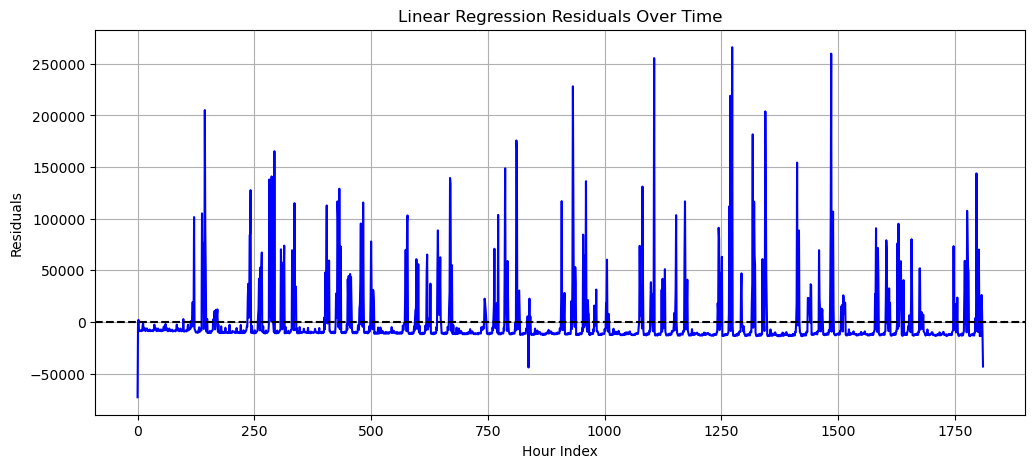

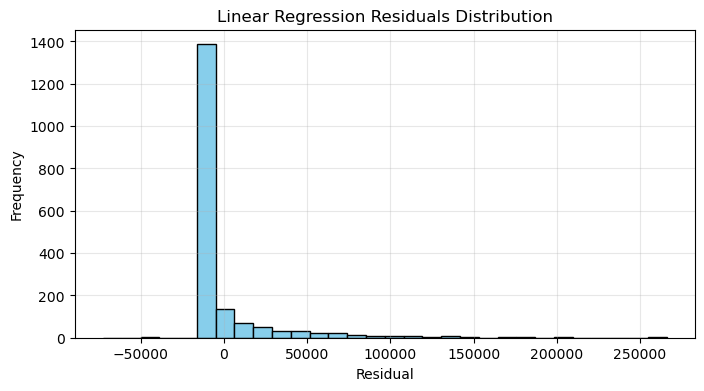

In [72]:
import matplotlib.pyplot as plt

# --- Time series residual plot ---
plt.figure(figsize=(12,5))
plt.plot(residuals_bytes_all, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Linear Regression Residuals Over Time')
plt.xlabel('Hour Index')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# --- Histogram of residuals ---
plt.figure(figsize=(8,4))
plt.hist(residuals_bytes_all.dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Linear Regression Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


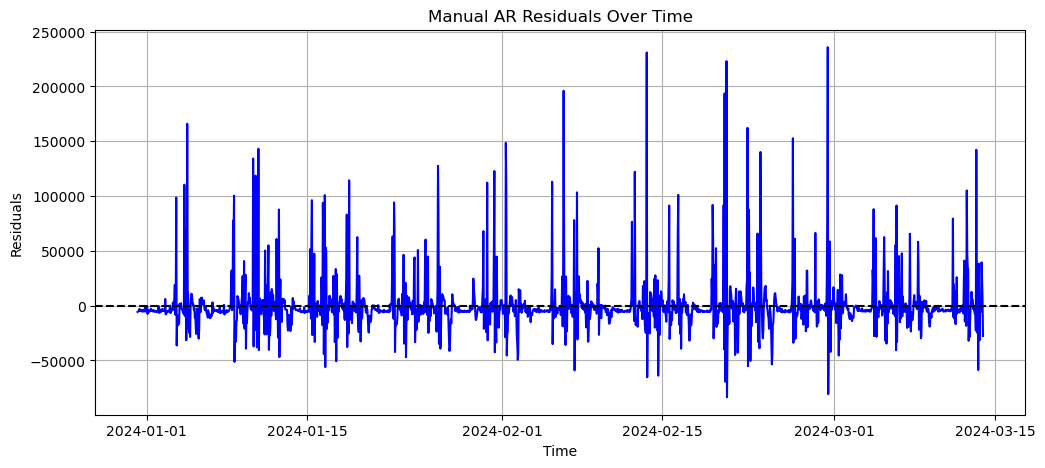

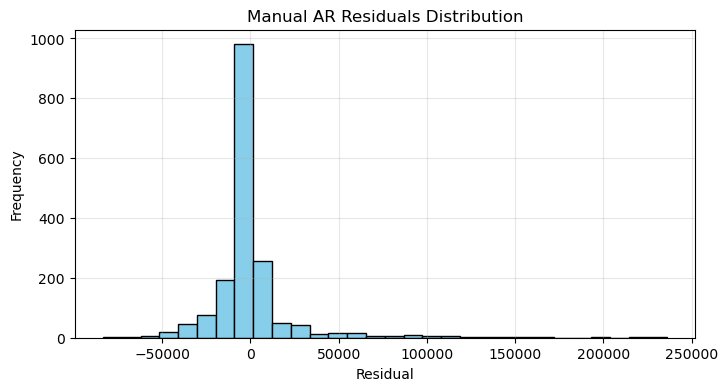

In [74]:
# --- Time series residual plot ---
plt.figure(figsize=(12,5))
plt.plot(residuals_manual_ar_full, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Manual AR Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# --- Histogram ---
plt.figure(figsize=(8,4))
plt.hist(residuals_manual_ar_full, bins=30, color='skyblue', edgecolor='black')
plt.title('Manual AR Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


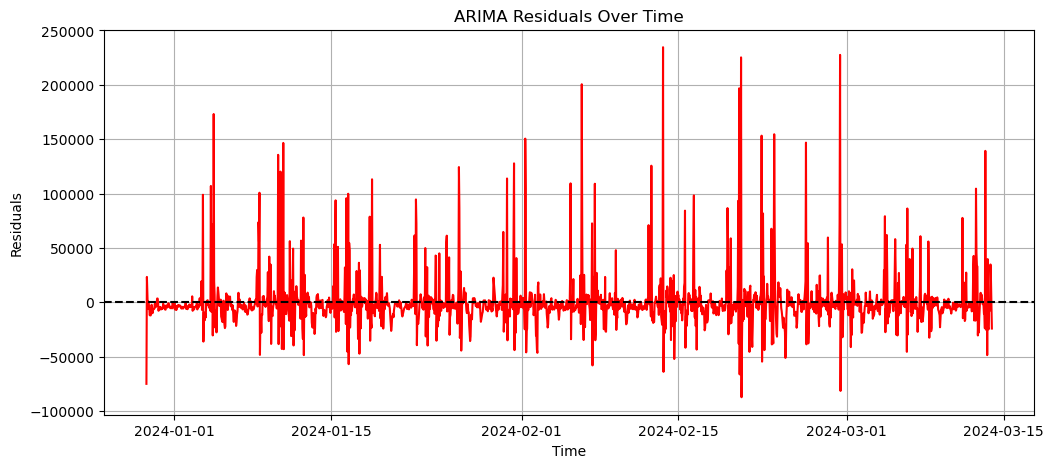

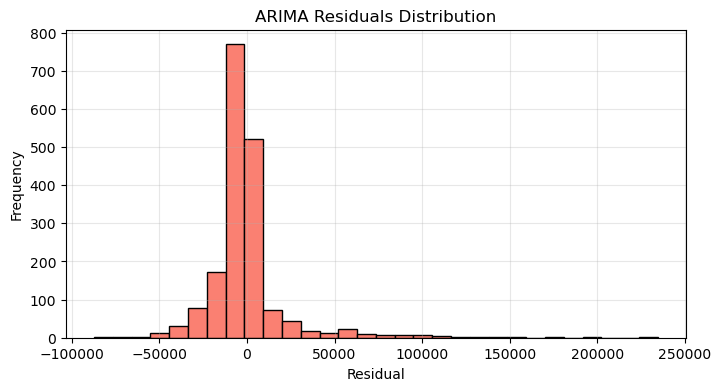

In [76]:
# --- Time series residual plot ---
plt.figure(figsize=(12,5))
plt.plot(residuals_arima_full, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('ARIMA Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# --- Histogram ---
plt.figure(figsize=(8,4))
plt.hist(residuals_arima_full, bins=30, color='salmon', edgecolor='black')
plt.title('ARIMA Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


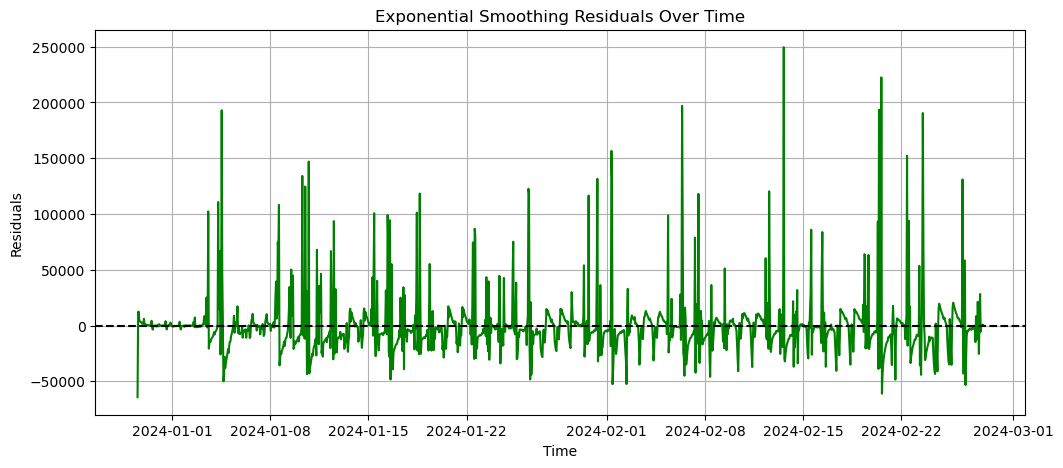

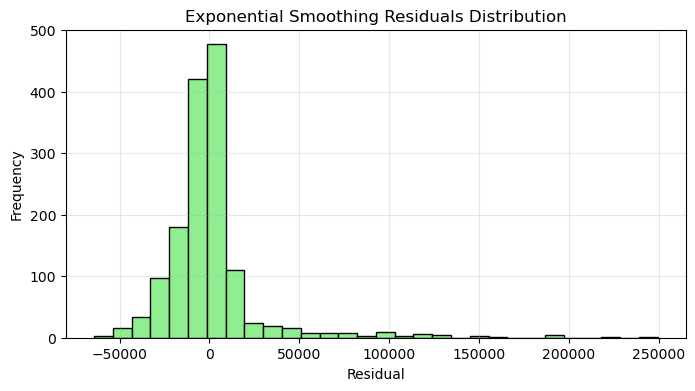

In [78]:
# --- Time series residual plot ---
plt.figure(figsize=(12,5))
plt.plot(residuals_exp_full, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Exponential Smoothing Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# --- Histogram ---
plt.figure(figsize=(8,4))
plt.hist(residuals_exp_full, bins=30, color='lightgreen', edgecolor='black')
plt.title('Exponential Smoothing Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


In [80]:
# --- Create a DataFrame with residuals for all models ---
residuals_df = pd.DataFrame({
    'Linear_Regression': residuals_bytes_all,        # full dataset residuals
    'Manual_AR': residuals_manual_ar_full,           # full dataset residuals
    'ARIMA': residuals_arima_full,                   # full dataset residuals
    'Exponential_Smoothing': residuals_exp_full      # full dataset residuals
})

# --- Summary statistics ---
summary_stats = residuals_df.describe().T  # Transpose for readability
summary_stats['skew'] = residuals_df.skew()
summary_stats['kurtosis'] = residuals_df.kurtosis()

# --- Display summary stats ---
summary_stats


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Linear_Regression,1811.0,-214.537690,29424.015420,-72791.700448,-11655.752349,-10134.481193,-6110.214113,266040.055142,4.251107,23.069911
Manual_AR,1771.0,125.328922,25810.383835,-83611.642592,-6471.349118,-4061.727952,1707.806760,235820.386304,3.651300,21.919067
ARIMA,1811.0,20.921833,25396.151471,-87352.584476,-7947.485392,-3174.242496,1918.646611,234562.727951,3.731162,23.146793
Exponential_Smoothing,1448.0,-68.619084,27035.361221,-64215.322938,-10852.975350,-2046.625257,3844.565128,249460.959368,3.626667,20.834785


## Residuals Comparison Summary

We compared residuals from four models predicting hourly link utilization: Linear Regression, Manual Auto-Regressive (AR), ARIMA, and Exponential Smoothing. Below is the summary based on statistical measures.

| Model | Bias (Mean) | Spread (Std) | Skew | Notes |
|-------|-------------|-------------|------|-------|
| **Linear Regression** | Slight underprediction (-215) | Largest (29,424) | Very right-skewed (4.25) | Good for trend estimation but struggles with extreme spikes. |
| **Manual AR** | Slight overprediction (125) | Low (25,810) | Right-skewed (3.65) | Stable for typical hours, loses initial data due to lags. |
| **ARIMA** | Almost zero (21) | Lowest (25,396) | Right-skewed (3.73) | Very stable, handles most fluctuations well; best overall generalization. |
| **Exponential Smoothing** | Slight underprediction (-69) | Medium (27,035) | Right-skewed (3.63) | Smooths well, but misses early points and struggles with large positive spikes. |

### Key Insights:
1. **ARIMA and Manual AR** offer the most stable residuals with lower spread.  
2. **Linear Regression** captures the trend but is highly sensitive to spikes.  
3. **Exponential Smoothing** smooths data but may underperform on spikes and early observations.  
4. All models show **heavy-tailed residual distributions** (high kurtosis), indicating occasional extreme errors — typical for network traffic data.
5. Hourly seasonality in the dataset could also be addressed using SARIMA to explicitly model seasonal AR and MA components. This could be explored in future work.
